## Large scale machine learning in Sklearn
* For large scale data models we use following methods
* - fit() vs partial_fit() 
* combining preprocessing and incremental learning

### Incremental Learning in sklearn
to perform incremental learning, Scikit-learn implements  ```partial_fit``` method that hels in training an out-of-memory dataset. In otherwords, it has the ability to learn incrementally from a batch of instances.<br><br>
In this colab, we will see an example of how to read, process, and train on such a large dataset that can't be loaded in memeory entirely.<br><br>
This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core(online) learning. This function has some performance overhead, so it's recommended to call it on a considerable large batch of data(that fits into the memory), to overcomethe limitation of overhead.

### partial_fit()attributes:
partial_fit(X, y, [classes], [sample_weights]):
where, 
* x: array of shape (n_samples, n_features) n_smaples:- num_of_samples, n_features:- number of features
* y: array of target variable
* classes: array of shape(n_classes,) containing a list of all the classes that can possibly appear in the y vector.
must be provided at the firt call to partial_fit, can be omitted in subsequent calls
* sample_weight: array of shape containing weights applied to individual samples
---
For classification tasks, we have to pass the list of possible target class laels in  ```classes``` parameter to cope-up with the unseen target classes in the 1st batch of the data 

The partial fit method is available in the following classe: -
* **Classification** 
* - MultinomialNB
* - BernoulliNB
* - SGDClassifier
* - Perceptron
* **Regression:**
* - SGDRegressor
* **Clustering:**
* - MiniBatchKmeans

### Example

In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
X, y = make_classification(n_samples= 50000, n_features= 10,
                           n_classes= 3, n_clusters_per_class= 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.15)

In [4]:
clf1 = SGDClassifier(max_iter= 1000, tol= 0.01)

In [5]:
clf1.fit(x_train, y_train)
clf1.score(x_train, y_train)

0.8179764705882353

In [6]:
clf1.score(x_test, y_test)

0.8224

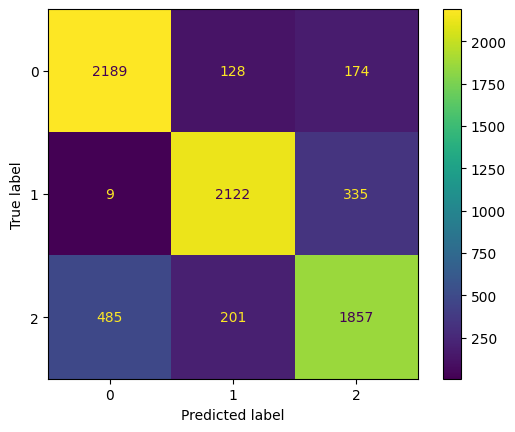

In [7]:
Cf_m = ConfusionMatrixDisplay.from_estimator(clf1, x_test, y_test)

In [8]:
print('confusion report', classification_report(y_test, clf1.predict(x_test)))

confusion report               precision    recall  f1-score   support

           0       0.82      0.88      0.85      2491
           1       0.87      0.86      0.86      2466
           2       0.78      0.73      0.76      2543

    accuracy                           0.82      7500
   macro avg       0.82      0.82      0.82      7500
weighted avg       0.82      0.82      0.82      7500



In [9]:
import numpy as np

In [10]:
train_data = np.concatenate((x_train, y_train[:, np.newaxis]), axis= 1)
a = np.asarray(train_data)
np.savetxt('train_data.csv', a, delimiter=',')

In [12]:
clf2 = SGDClassifier(max_iter= 1000, tol= 0.01)


### Processing data chunk by chunk


In [13]:
import pandas as pd

chunksize = 1000
iter = 0
for train_df in pd.read_csv('train_data.csv', chunksize= chunksize, iterator= True):
    iter += 1
    if iter== 1:
        x_train_partial = train_df.iloc[:, 0:10]
        y_train_partial = train_df.iloc[:, 10]
        clf2.partial_fit(x_train_partial, y_train_partial,
                         classes= np.array([0, 1, 2]))
    else:
        x_train_partial = train_df.iloc[:, 0:10]
        y_train_partial = train_df.iloc[:, 10]
        clf2.partial_fit(x_train_partial, y_train_partial)
    print('after iter {0}'.format(iter))
    print('coefficent is:', clf2.coef_)
    print('Intercept is:', clf2.intercept_)
    

after iter 1
coefficent is: [[ -1.90933805   4.95263531  -1.22626532  -9.64035923  25.72327031
   24.16436306   5.93243807  -1.09306276   1.85296565   8.91904286]
 [ -8.37419634  13.41257457   0.67898233   5.10349038 -36.50766069
  -49.38462078  18.62858906  19.08925417 -23.83292803  -8.38829801]
 [ 14.3521199    6.40099422  -4.12734915  12.68106745 -17.52860482
    1.30095725 -17.18166787 -13.65644562 -11.52795923 -11.10550271]]
Intercept is: [-18.14589396 -52.21568529 -47.46024024]
after iter 2
coefficent is: [[ -2.03941712  -1.36808961   1.29960916   5.82468291  22.82686299
   20.97372183  -0.20312966  14.91798045 -10.67958502   8.04770455]
 [ -6.11851968 -10.65843037   7.52960871  -5.05705127 -30.91211453
  -40.49194926   3.2821487   -6.88430478   0.63848972  -7.4771358 ]
 [ 12.27386008  -0.54923258  -3.26820839  -3.8512591  -10.85456238
    5.4156609   -8.56513408  -0.5550072    1.17889815  -8.18162087]]
Intercept is: [-17.1685309  -29.28377916 -42.01432243]
after iter 3
coefficen

In [14]:
train_score = clf2.score(x_train, y_train)
test_score = clf2.score(x_test, y_test)
print('Train score is {0}, and Test score is: {1}'.format(train_score, test_score))

Train score is 0.7148470588235294, and Test score is: 0.7113333333333334


/home/anni/Data/BS/jupyter_notebook/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/home/anni/Data/BS/jupyter_notebook/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [15]:
print('classification report ', classification_report(y_test, clf2.predict(x_test)))

classification report                precision    recall  f1-score   support

           0       0.77      0.83      0.80      2491
           1       0.66      0.94      0.78      2466
           2       0.72      0.37      0.49      2543

    accuracy                           0.71      7500
   macro avg       0.72      0.71      0.69      7500
weighted avg       0.72      0.71      0.69      7500



/home/anni/Data/BS/jupyter_notebook/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


### Incremental Preporcessing Example
```CountVectorizer``` VS ```HashingVetorizer```
Vectorizers are used to convert a collectiono of text documents to vector representation, thus helping in preprocessing them before applying any model on these text documents.


In [28]:
text_documents = [''' If you're looking for random paragraphs, you've come to the right place. When a random word or a random sentence isn't quite enough, the next logical step is to find a random paragraph. We created the Random Paragraph Generator with you in mind. The process is quite simple. Choose the number of random paragraphs you'd like to see and click the button. Your chosen number of paragraphs will instantly appear.

While it may not be obvious to everyone, there are a number of reasons creating random paragraphs can be useful. A few examples of how some people use this generator are listed in the following paragraphs. ''',
'''### Incremental Learning in sklearn
to perform incremental learning, Scikit-learn implements  ```partial_fit``` method that hels in training an out-of-memory dataset. In otherwords, it has the ability to learn incrementally from a batch of instances.<br><br>
In this colab, we will see an example of how to read, process, and train on such a large dataset that can't be loaded in memeory entirely.<br><br>
This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core(online) learning. This function has some performance overhead, so it's recommended to call it on a considerable large batch of data(that fits into the memory), to overcomethe limitation of overhead.''']


In [29]:
from sklearn.feature_extraction.text import CountVectorizer 
c_vectorizer = CountVectorizer()


In [30]:
X_c = c_vectorizer.fit_transform(text_documents)

In [31]:
X_c.shape

(2, 126)

In [24]:
c_vectorizer.vocabulary_

{'if': 21,
 'you': 67,
 're': 46,
 'looking': 30,
 'for': 18,
 'random': 45,
 'paragraphs': 40,
 've': 60,
 'come': 9,
 'to': 57,
 'the': 54,
 'right': 48,
 'place': 42,
 'when': 62,
 'word': 66,
 'or': 38,
 'sentence': 50,
 'isn': 25,
 'quite': 44,
 'enough': 12,
 'next': 33,
 'logical': 29,
 'step': 53,
 'is': 24,
 'find': 16,
 'paragraph': 39,
 'we': 61,
 'created': 10,
 'generator': 19,
 'with': 65,
 'in': 22,
 'mind': 32,
 'process': 43,
 'simple': 51,
 'choose': 6,
 'number': 35,
 'of': 37,
 'like': 27,
 'see': 49,
 'and': 0,
 'click': 8,
 'button': 4,
 'your': 68,
 'chosen': 7,
 'will': 64,
 'instantly': 23,
 'appear': 1,
 'while': 63,
 'it': 26,
 'may': 31,
 'not': 34,
 'be': 3,
 'obvious': 36,
 'everyone': 13,
 'there': 55,
 'are': 2,
 'reasons': 47,
 'creating': 11,
 'can': 5,
 'useful': 59,
 'few': 15,
 'examples': 14,
 'how': 20,
 'some': 52,
 'people': 41,
 'use': 58,
 'this': 56,
 'listed': 28,
 'following': 17}

In [32]:
print(X_c)

  (0, 44)	1
  (0, 124)	4
  (0, 92)	1
  (0, 64)	1
  (0, 37)	1
  (0, 91)	7
  (0, 83)	5
  (0, 117)	1
  (0, 18)	1
  (0, 112)	4
  (0, 108)	7
  (0, 96)	1
  (0, 88)	1
  (0, 119)	1
  (0, 123)	1
  (0, 77)	1
  (0, 99)	1
  (0, 54)	1
  (0, 90)	2
  (0, 27)	1
  (0, 70)	1
  (0, 63)	1
  (0, 105)	1
  (0, 53)	2
  (0, 34)	1
  :	:
  (1, 66)	1
  (1, 28)	1
  (1, 32)	1
  (1, 11)	1
  (1, 100)	1
  (1, 111)	1
  (1, 19)	1
  (1, 26)	1
  (1, 15)	1
  (1, 103)	2
  (1, 5)	1
  (1, 45)	1
  (1, 21)	1
  (1, 76)	1
  (1, 39)	1
  (1, 87)	1
  (1, 81)	2
  (1, 95)	1
  (1, 10)	1
  (1, 20)	1
  (1, 24)	1
  (1, 35)	1
  (1, 52)	1
  (1, 80)	1
  (1, 60)	1


In [33]:
from sklearn.feature_extraction.text import HashingVectorizer


In [34]:
h_vectorizer = HashingVectorizer(n_features= 50)


In [35]:
x_h = h_vectorizer.fit_transform(text_documents)

In [36]:
x_h.shape

(2, 50)

In [37]:
print(x_h[0])

  (0, 0)	-0.05965499862718936
  (0, 2)	-0.05965499862718936
  (0, 3)	-0.05965499862718936
  (0, 5)	0.17896499588156806
  (0, 6)	-0.11930999725437871
  (0, 7)	-0.11930999725437871
  (0, 8)	-0.4175849903903255
  (0, 10)	0.05965499862718936
  (0, 11)	0.0
  (0, 13)	-0.05965499862718936
  (0, 14)	0.05965499862718936
  (0, 15)	-0.05965499862718936
  (0, 16)	0.05965499862718936
  (0, 17)	-0.05965499862718936
  (0, 18)	0.11930999725437871
  (0, 19)	0.0
  (0, 20)	0.05965499862718936
  (0, 21)	0.0
  (0, 26)	0.05965499862718936
  (0, 27)	0.0
  (0, 28)	0.0
  (0, 31)	0.0
  (0, 32)	0.11930999725437871
  (0, 34)	-0.11930999725437871
  (0, 35)	0.17896499588156806
  (0, 36)	-0.4175849903903255
  (0, 37)	0.0
  (0, 38)	0.2982749931359468
  (0, 39)	0.05965499862718936
  (0, 40)	0.05965499862718936
  (0, 41)	0.2982749931359468
  (0, 42)	-0.05965499862718936
  (0, 43)	-0.05965499862718936
  (0, 45)	-0.05965499862718936
  (0, 46)	0.4175849903903255
  (0, 47)	0.05965499862718936
  (0, 48)	-0.11930999725437871

## combine example of incremental preprocessing and model training

In [38]:
import pandas as pd
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile
import urllib.request

In [41]:
resp = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
zipfile = ZipFile(BytesIO(resp.read()))


In [42]:
data = TextIOWrapper(zipfile.open('sentiment labelled sentences/amazon_cells_labelled.txt'), encoding= 'utf-8')

df = pd.read_csv(data, sep= '\t')
df.columns = ['review', 'sentiment']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [44]:
df.head()

,review,sentiment
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [45]:
df.tail()

,review,sentiment
994,The screen does get smudged easily because it ...,0
995,What a piece of junk.. I lose more calls on th...,0
996,Item Does Not Match Picture.,0
997,The only thing that disappoint me is the infra...,0
998,"You can not answer calls with the unit, never ...",0


In [46]:
df.describe()

,sentiment
count,999.000000
mean,0.500501
std,0.500250
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [51]:
X = df.loc[:, 'review']
y = df.loc[:, 'sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [52]:
from sklearn.feature_extraction.text import HashingVectorizer
h_vectorizer = HashingVectorizer()

In [53]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(penalty= 'l2', loss='hinge')


In [54]:
x_train_part1_hashed = h_vectorizer.fit_transform(x_train[0:400])
y_train_part1 = y_train[0:400]


In [55]:
all_classes = np.unique(df.loc[:, 'sentiment'])


In [56]:
classifier.partial_fit(x_train_part1_hashed, y_train_part1, classes= all_classes)

SGDClassifier()

In [57]:
x_test_hased = h_vectorizer.transform(x_test)

In [58]:
test_score = classifier.score(x_test_hased, y_test)
print('Test score', test_score)

Test score 0.755


In [59]:
x_train_part2_hased = h_vectorizer.fit_transform(x_train[400:])
y_train_part2 = y_train[400:]

In [60]:
classifier.partial_fit(x_train_part2_hased, y_train_part2)

SGDClassifier()

In [61]:
classifier.score(x_test_hased, y_test)

0.74